## 配合課程影片 hmwu_StatR-09.1
### Exercise 9-1

In [1]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# 請完成自定義函數 prediction_accuracy_rate：
# Hint: at_least_one_accuracy 為至少有一個預測正確的機率 

def prediction_accuracy_rate(no_classifier, accuracy_rate):
    temp = {"Number_of_classifier": no_classifier, "at_least_one_accuracy": 1 - (1 - accuracy_rate) ** no_classifier}    
    return temp

prediction_accuracy_rate(no_classifier = 1, accuracy_rate = 0.5)


{'Number_of_classifier': 1, 'at_least_one_accuracy': 0.5}

In [3]:
prediction_accuracy_rate(no_classifier = 1, accuracy_rate = 0.5)['Number_of_classifier']

1

In [4]:
result = pd.DataFrame({
    "Number_of_classifier": pd.Series(np.arange(1, 11)).apply(lambda x: prediction_accuracy_rate(x, 0.5)["Number_of_classifier"]),
    "at_least_one_accuracy": pd.Series(np.arange(1, 11)).apply(lambda x: prediction_accuracy_rate(x, 0.5)["at_least_one_accuracy"])
})

result

,Number_of_classifier,at_least_one_accuracy
0,1,0.500000
1,2,0.750000
2,3,0.875000
3,4,0.937500
4,5,0.968750
5,6,0.984375
6,7,0.992188
7,8,0.996094
8,9,0.998047
9,10,0.999023


## 資料切分

In [5]:
# 將 iris 資料切分成 Training set + Test set:

from sklearn import datasets
iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [7]:
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 方法1：利用取後放回的方式，把所有樣本分成2類編號

In [8]:
ID = np.random.choice(a = 2, size = len(iris["data"]), replace = True, p = [0.9, 0.1])
len(ID)

150

In [9]:
ID

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1])

In [10]:
# Hint: Training set ID = 0 ; Testing set ID = 1
train_data = iris["data"][ID == 0, :]
train_target = iris["target"][ID == 0]

test_data = iris["data"][ID == 1, :]
test_target = iris["target"][ID == 1]

print(train_data.shape)
print(train_target.shape)
print(test_data.shape)
print(test_target.shape)

(133, 4)
(133,)
(17, 4)
(17,)


### 方法2：利用取後不放回的方式，挑選出需要的樣本 （random index）


In [11]:
iris_id = np.arange(len(iris["data"]))
np.random.shuffle(iris_id)

features = iris["data"][iris_id, :]
label = iris["target"][iris_id]

In [12]:
train_features = features[:int(0.9*len(features))]
train_label = label[:int(0.9*len(features))]

test_features = features[int(0.9*len(features)):]
test_label = label[int(0.9*len(features)):]

print(train_features.shape)
print(train_label.shape)
print(test_features.shape)
print(test_label.shape)

(135, 4)
(135,)
(15, 4)
(15,)


In [13]:
#a = iris["target"]
#a.reshape(150, -1).shape

### 方法3: 將 Y 依照 group labels 與切分比例將所有樣本分成2類

In [14]:
def get_train_test_stratified_index(y, SplitRatio):
    y = np.array(y)
    train_indexes = np.zeros(len(y), dtype = bool)
    test_indexes = np.zeros(len(y), dtype = bool)
    types = np.unique(iris["target"])

    for value in types:
        value_indexes = np.nonzero(y == value)[0]
        np.random.shuffle(value_indexes)
        n = int(SplitRatio * len(value_indexes))
        
        train_indexes[value_indexes[:n]] = True
        test_indexes[value_indexes[n:]] = True
        
    return train_indexes, test_indexes

# Y label 的三種花都以 TRUE : FALSE = 0.8 : 0.2 切分
train_indexes, test_indexes = get_train_test_stratified_index(iris["target"], SplitRatio = 0.8)

print("Indexes of Training set:", train_indexes)
print(train_indexes.shape)

Indexes of Training set: [False  True  True  True  True  True  True  True  True False  True  True
 False False  True  True  True  True  True  True False False  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True False  True  True  True
 False  True  True  True False  True  True  True  True  True  True  True
  True False  True  True False  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True False False  True  True  True False  True False
  True  True False False False  True  True False  True False  True  True
  True  True False  True  True  True  True  True  True  True False  True
  True  True False  True False  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True False  True]
(150,)


In [15]:
train_variables = iris["data"][train_indexes]
train_target = iris["target"][train_indexes]

test_variables = iris["data"][test_indexes]
test_target = iris["target"][test_indexes]

print(train_variables.shape)
print(train_target.shape)
print(test_variables.shape)
print(test_target.shape)

(120, 4)
(120,)
(30, 4)
(30,)


### Jackknife Estimate the Coefficient of Variation

In [16]:
# 練習手刻 Jackknife Estimate the Coefficient of Variation
#np.random.seed(30)
x = stats.uniform.rvs(size = 30, random_state = 0)
n = len(x)

x

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
       0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443,
       0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194])

In [17]:
# 請計算根據所有樣本計算出來的 CV估計值 theta:
# np.var(ddof):
# ddof = 1 provides an unbiased estimator of the variance of a hypothetical infinite population.
# ddof = 0 provides a maximum likelihood estimate of the variance for normally distributed variables.

def CV(X):
    x = np.array(X)
    return np.sqrt(x.var(ddof = 1)) / x.mean()

theta = CV(x)
theta

0.4903694340921092

In [18]:
# 請計算所有 leave-one-out 的 CV估計值 theta_i:
# Hint: 每次都排除1個樣本後，再做CV估計。總共會生成 n個 leave-one-out estimations 
theta_i = np.array([CV(np.delete(x, i)) for i in range(len(x))])
theta_i

array([0.49798015, 0.50106124, 0.49963953, 0.49783479, 0.49172929,
       0.50051286, 0.49259047, 0.49752775, 0.49395476, 0.48901128,
       0.5004172 , 0.49720932, 0.49864358, 0.49600682, 0.45586651,
       0.45811423, 0.44835947, 0.49952182, 0.50062866, 0.49835876,
       0.49304798, 0.50028336, 0.4939709 , 0.50059474, 0.46229067,
       0.5004161 , 0.4654896 , 0.49502425, 0.49691627, 0.49115144])

In [19]:
# 請計算 Jackknife Estimate the Coefficient of Variation
# Hint: 請參考 resulting bias-corrected Jackknife estimate 公式，會運用到 theta 和 theta_i 
theta_jack = n * theta - (n - 1) * theta_i.mean()
theta_jack

0.4874010184059756

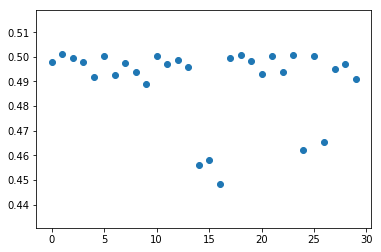

In [20]:
plt.scatter(x = [i for i in range(len(theta_i))], y = theta_i)

### 挑戰題：
### 線性回歸模型係數的 Jackknife Estimation：

In [21]:
np.random.seed(2)
n, p = 50, 5

In [22]:
matrix = np.array(stats.norm.rvs(loc = 0, scale = 1, size = n*p)).reshape(50, 5)
mydata = pd.DataFrame(matrix, columns = ["V1", "V2", "V3", "V4", "V5"])

print(mydata.shape)
print(mydata.head(5))

(50, 5)
         V1        V2        V3        V4        V5
0 -0.416758 -0.056267 -2.136196  1.640271 -1.793436
1 -0.841747  0.502881 -1.245288 -1.057952 -0.909008
2  0.551454  2.292208  0.041539 -1.117925  0.539058
3 -0.596160 -0.019130  1.175001 -0.747871  0.009025
4 -0.878108 -0.156434  0.256570 -0.988779 -0.338822


In [23]:
# 請建立線性回歸模型的公式組成： V1 = a1 + a2*V2 + a3*V3 + a4*V4
# Hint: formula(Y ~ X) , Y is dependent variable, X is independent variable
# 請完成自定義函數 theta_coef:
# Hint: lm 就是 線性回歸模型
# model_lm.fit().summary()
# model_lm.fit().params

from statsmodels.formula.api import ols

def theta_coef(x, xdata, coefficient):
    model_lm = ols("V1 ~ V2 + V3 + V4", data = xdata.loc[x])
    results = model_lm.fit()
    return results.params[str(coefficient)]

def theta_leave_one_coef(x, xdata, coefficient):
    model_lm = ols("V1 ~ V2 + V3 + V4", data = xdata.drop(x, axis = 0))
    results = model_lm.fit()
    return results.params[str(coefficient)]

# 計算特定樣本
#theta_coef(x = 2, xdata = mydata, coefficient = "Intercept")
#theta_leave_one_coef(x = 1, xdata = mydata, coefficient = "Intercept")

In [24]:
# 請計算線性回歸模型中，截距項係數的 Jackknife Estimation:
# n, len(Jack_values)
#mydata = pd.DataFrame(x.reshape(6,5), columns = ["V1", "V2", "V3", "V4", "V5"])

thetahat = ols("V1 ~ V2 + V3 + V4", data = mydata).fit().params["Intercept"]
Jack_values = np.array([theta_leave_one_coef(x = i, xdata = mydata, coefficient = "Intercept") for i in range(len(mydata))])
theta_Jack = (len(Jack_values)*thetahat - (len(Jack_values) - 1)*Jack_values).mean()
Jack_bias = (len(Jack_values) - 1) * (Jack_values.mean() - thetahat)
Jack_se = np.sqrt(((len(Jack_values) - 1)/len(Jack_values)) * sum((Jack_values - Jack_values.mean())**2))

print("The calculated estimator of the coefficient based on all n observations:", thetahat)
print("The collection of these leave-one-out estimations: \n", Jack_values)
print("The Average of resulting bias-corrected Jackknife estimation:", theta_Jack)
print("Jackknife_bias:", Jack_bias)
print("Jackknife_se:", Jack_se)

The calculated estimator of the coefficient based on all n observations: 0.07181883347307495
The collection of these leave-one-out estimations: 
 [0.07627918 0.08065543 0.05301953 0.09220865 0.09167118 0.06927506
 0.0722736  0.04900954 0.0761246  0.07685158 0.05162291 0.04262493
 0.08412314 0.07202833 0.08495355 0.03572077 0.08901313 0.11956439
 0.07243888 0.05816248 0.05609195 0.0013434  0.07519045 0.08759722
 0.09389856 0.05759356 0.0753484  0.04944509 0.08800588 0.05789602
 0.04465677 0.07199498 0.09253522 0.07960002 0.03780245 0.08812849
 0.04998531 0.06095538 0.05302191 0.03605868 0.1030518  0.10081917
 0.10800345 0.07176093 0.07592558 0.11020891 0.06046211 0.08965221
 0.10788989 0.06397764]
The Average of resulting bias-corrected Jackknife estimation: 0.06634985282341667
Jackknife_bias: 0.005468980649658561
Jackknife_se: 0.15937146526835802


### 樣本平均數的 Bootstrap Estimation:

In [25]:
xxx = np.array([0.5855288, 0.7094660, -0.1093033, -0.4534972, 0.6058875, -1.8179560, 0.6300986, -0.2761841,
                -0.2841597, -0.9193220, -0.1162478, 1.8173120, 0.3706279, 0.5202165, -0.7505320, 0.8168998,
               -0.8863575, -0.3315776, 1.1207127, 0.2987237])

# 接下來兩種不同重抽法產生的估計量，都是以此為待估參數：（視為比較基準）
xxx.mean()

0.07651681499999999

In [26]:
# 根據這 100 個 Bootstrap estimation samples 計算樣本平均數的 Bootstrap Estimation： 

xxx_bootstrap_mean = np.array([np.random.choice(xxx, len(xxx), replace = True).mean() for i in range(100)])
xxx_bootstrap_mean

array([ 0.31479696, -0.08848972, -0.11284176, -0.05683054, -0.12041232,
        0.0099345 , -0.01069587,  0.15442243,  0.14954299,  0.53171748,
        0.06376438,  0.06730892,  0.14584379,  0.34763341, -0.1102875 ,
       -0.04683628, -0.0085361 , -0.05772329,  0.17884119,  0.08137619,
       -0.02119099,  0.19185863,  0.24005881,  0.24633854, -0.05504772,
       -0.10712852,  0.1680524 ,  0.15549105,  0.33645113, -0.00526597,
        0.03285371,  0.22796725,  0.09533613,  0.17270637,  0.06828193,
        0.47224229,  0.06736053,  0.37944203,  0.15735683,  0.21989132,
       -0.02664353,  0.09315727,  0.27376901, -0.10373226,  0.36642818,
        0.39576515,  0.09431283, -0.03771089,  0.18788826,  0.06076377,
       -0.09631845,  0.06233576, -0.11006436,  0.31450435, -0.07064313,
       -0.15031992,  0.18673302, -0.00676049,  0.18649036,  0.30988294,
       -0.01770353, -0.15796655, -0.17129295,  0.32574132,  0.15564415,
        0.14946497,  0.27032832,  0.10978581,  0.23130101,  0.37

In [27]:
# 樣本平均數的 Jackknife Estimation:

def Jack_sample_mean(x):
    X = np.array(x)
    n = len(X)
    
    mu_hat = X.mean()
    Jack_values = np.array([np.delete(X, i).mean() for i in range(n)])
    mu_hat_Jack = (len(Jack_values)*mu_hat - (len(Jack_values) - 1)*Jack_values).mean()
    Jack_bias = (len(Jack_values) - 1) * (Jack_values.mean() - mu_hat)
    Jack_se = np.sqrt(((len(Jack_values) - 1)/len(Jack_values)) * sum((Jack_values - Jack_values.mean())**2))
    
    return mu_hat, Jack_values, mu_hat_Jack, Jack_bias, Jack_se

mu_hat = Jack_sample_mean(x)[0]
Jack_values = Jack_sample_mean(x)[1]
mu_hat_Jack = Jack_sample_mean(x)[2]
Jack_bias = Jack_sample_mean(x)[3]
Jack_se = Jack_sample_mean(x)[4]

print("mu_hat:", mu_hat)
print("Jackknife_values: \n", Jack_values)
print("mu_hat_Jackknife:", mu_hat_Jack)
print("Jackknife_bias:", Jack_bias)
print("Jackknife_se:", Jack_se)

mu_hat: 0.5811203282945502
Jackknife_values: 
 [0.58223436 0.57649726 0.58037402 0.58236989 0.58655017 0.57888675
 0.58606975 0.57040817 0.56792921 0.58793684 0.5738581  0.5829212
 0.58157122 0.56924183 0.59870944 0.5981545  0.60046177 0.57244793
 0.57432597 0.57115854 0.5674135  0.57360177 0.58524588 0.57424416
 0.59708053 0.57909272 0.59621574 0.56858417 0.58316419 0.58686027]
mu_hat_Jackknife: 0.581120328294549
Jackknife_bias: 3.219646771412954e-15
Jackknife_se: 0.0520270057569304


### Bootstrap Estimate the Coefficient of Variation

In [28]:
# 練習手刻 Bootstrap Estimate the Coefficient of Variation
#np.random.seed(30)
x = stats.uniform.rvs(size = 30, random_state = 0)
n = len(x)

x

array([0.5488135 , 0.71518937, 0.60276338, 0.54488318, 0.4236548 ,
       0.64589411, 0.43758721, 0.891773  , 0.96366276, 0.38344152,
       0.79172504, 0.52889492, 0.56804456, 0.92559664, 0.07103606,
       0.0871293 , 0.0202184 , 0.83261985, 0.77815675, 0.87001215,
       0.97861834, 0.79915856, 0.46147936, 0.78052918, 0.11827443,
       0.63992102, 0.14335329, 0.94466892, 0.52184832, 0.41466194])

In [29]:
# 請計算根據所有樣本計算出來的 CV估計值 theta:
# np.var(ddof):
# ddof = 1 provides an unbiased estimator of the variance of a hypothetical infinite population.
# ddof = 0 provides a maximum likelihood estimate of the variance for normally distributed variables.
# Hint: 針對所有樣本 x 進行取後放回抽樣，直至抽樣個數與原有樣本數一樣多後，再進行估計

def CV(X):
    x = np.array(X)
    return np.sqrt(x.var(ddof = 1)) / x.mean()

CV(np.random.choice(x, len(x), replace = True))

0.3823683202728915

In [30]:
# 請計算 100 個 Bootstrap estimation samples: 
# 最後根據這 100 個 Bootstrap estimation samples 計算平均與變異數，形成CV估計量的分佈

boot = np.array([CV(np.random.choice(x, len(x), replace = True)) for i in range(100)])

print(boot)
print(boot.mean())
print(boot.var())

[0.54282335 0.46680483 0.40019927 0.51872749 0.60582198 0.41500077
 0.51504127 0.3831742  0.48287214 0.61983277 0.55024486 0.58304337
 0.43744314 0.4868702  0.47034952 0.5532741  0.49802528 0.38474934
 0.4486168  0.40127631 0.5454479  0.61646964 0.53200718 0.38390776
 0.40578169 0.51734492 0.57453624 0.5180238  0.44196364 0.40762026
 0.50424509 0.47836904 0.57572091 0.48655108 0.63458282 0.4285543
 0.56395121 0.39190314 0.6536659  0.52860311 0.43958417 0.51530158
 0.4706088  0.5388668  0.55597215 0.46977587 0.535324   0.45519441
 0.48007247 0.54229846 0.52821728 0.42337959 0.46264463 0.4069738
 0.39879483 0.616653   0.50126241 0.54476784 0.48872448 0.46636119
 0.39864944 0.5589469  0.45107697 0.35731094 0.44424203 0.4128275
 0.55066444 0.55242732 0.45742509 0.38448031 0.50273634 0.49590537
 0.60572297 0.48568617 0.46323281 0.51340512 0.50847811 0.47749434
 0.45381784 0.52274031 0.41419976 0.58164802 0.39709512 0.44879558
 0.53690715 0.56136522 0.43091095 0.40745473 0.5118993  0.5126158

(array([ 5., 14.,  7., 16., 14., 14., 16.,  5.,  5.,  4.]),
 array([0.35731094, 0.38694644, 0.41658193, 0.44621743, 0.47585293,
        0.50548842, 0.53512392, 0.56475942, 0.59439491, 0.62403041,
        0.6536659 ]),
 <a list of 10 Patch objects>)

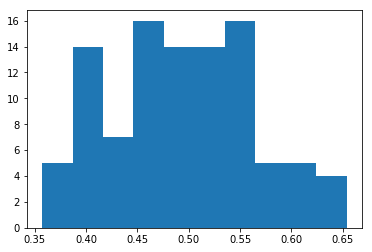

In [31]:
# 最後根據這 100 個 Bootstrap estimation samples 計算平均與變異數，形成CV估計量的分佈：

plt.hist(boot)

In [32]:
xxx = np.array([0.5855288, 0.7094660, -0.1093033, -0.4534972, 0.6058875, -1.8179560, 0.6300986, -0.2761841,
                -0.2841597, -0.9193220, -0.1162478, 1.8173120, 0.3706279, 0.5202165, -0.7505320, 0.8168998,
               -0.8863575, -0.3315776, 1.1207127, 0.2987237])

xxx.mean()

0.07651681499999999

### rpart, mlbench, adabag

In [33]:
Vehicle = pd.read_csv('./Data/Vehicle.csv', index_col = 0)

In [34]:
Vehicle.head()

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
1,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
2,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
3,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
4,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
5,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [35]:
Vehicle.shape # 846, 19
Vehicle['Class'].value_counts()

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier

In [37]:
X = Vehicle.copy()
X = X.drop('Class', axis = 1)
y = Vehicle['Class']

In [38]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 1/3)

In [39]:
# 根據 Vehicle_train，使用決策樹建模 DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(max_depth = 5)
clf = clf.fit(train_X, train_y)

In [40]:
# 根據決策樹模型物件 clf 和 test_X，進行Class分類預測：
y_pred = clf.predict(test_X)

In [41]:
# 請根據分類決策樹的預測結果，建立 Confusion Matrix tb:
tb = confusion_matrix(test_y, y_pred, sample_weight = None)

In [42]:
# 計算error rate：
error_rpart = 1 - tb.diagonal().sum() / tb.sum()
print('error rate:', error_rpart)

error rate: 0.2943262411347518


In [43]:
#==================================================================================
# 13/26
# 根據 Vehicle.train，使用Adaboost建模 boosting：

In [44]:
ada_clf = AdaBoostClassifier(clf, n_estimators = 10, learning_rate = 1)
ada_clf = ada_clf.fit(train_X, train_y)

In [45]:
# 根據Adaboost模型物件 ada_clf 和 test_X，進行Class分類預測：
y_pred = ada_clf.predict(test_X)

In [46]:
tb = confusion_matrix(test_y, y_pred, sample_weight = None)

In [47]:
error_rpart = 1 - tb.diagonal().sum() / tb.sum()
print('error rate:', error_rpart)

error rate: 0.3226950354609929


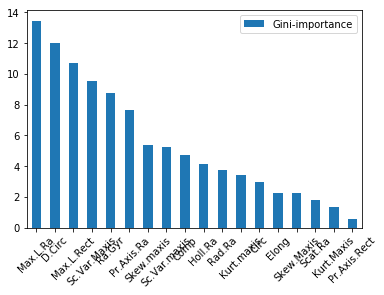

In [48]:
# Variable relative important:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(train_X.columns, ada_clf.feature_importances_):
    feats[feature] = importance*100 #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient = 'index').rename(columns = {0: 'Gini-importance'})
importances.sort_values(by = 'Gini-importance', ascending = False).plot(kind = 'bar', rot = 45)

In [49]:
importances.sort_values(by = 'Gini-importance', ascending = False)[:5]

,Gini-importance
Max.L.Ra,13.469792
D.Circ,12.040133
Max.L.Rect,10.719427
Sc.Var.Maxis,9.517741
Ra.Gyr,8.774633


In [50]:
#==================================================================================
# 14/26
# 10-fold cross validation with Adaboost:
# Hint: v-fold

In [51]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_predict

In [52]:
y_pred = cross_val_predict(ada_clf, X, y, cv=10)
Vehicle_boost_cv_confusion = confusion_matrix(y, y_pred)

In [53]:
Vehicle_boost_cv_error = 1 - Vehicle_boost_cv_confusion.diagonal().sum() / Vehicle_boost_cv_confusion.sum()
print('Error rate:', Vehicle_boost_cv_error)

Error rate: 0.27895981087470445


In [54]:
# 10-fold cross validation with bagging:
# Hint: v-fold

In [55]:
bagging_clf = BaggingClassifier(clf, n_estimators=10)

In [56]:
y_pred = cross_val_predict(bagging_clf, X, y, cv=10)
Vehicle_bag_cv_confusion = confusion_matrix(y, y_pred)

In [57]:
Vehicle_bag_cv_error = 1 - Vehicle_bag_cv_confusion.diagonal().sum() / Vehicle_bag_cv_confusion.sum()
print('Error rate:', Vehicle_bag_cv_error)

Error rate: 0.2565011820330969
